# Credit Risk Dtaset - Decision Tree

In [1]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/roari/Downloads/Credit Risk/credit_risk_dataset.csv"
credit_risk_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
credit_risk_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [2]:
credit_risk_data.shape

(32581, 12)

In [3]:
credit_risk_data.size

390972

In [4]:
credit_risk_data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [5]:
credit_risk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
credit_risk_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
credit_risk_data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

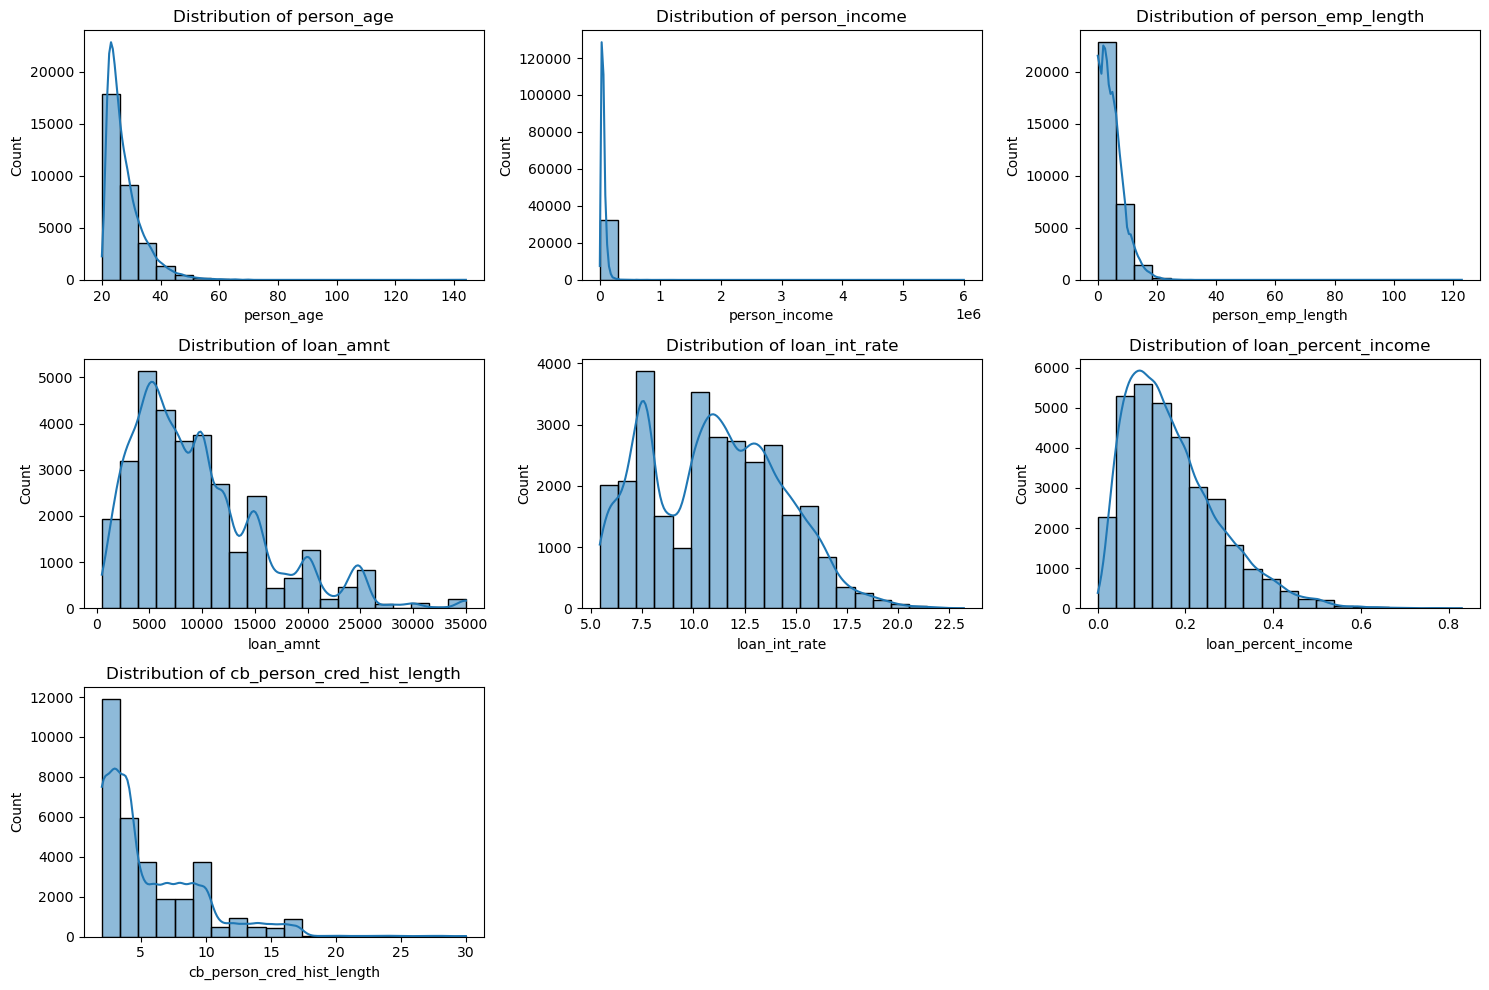

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numeric columns in your dataset to plot histograms
numeric_columns = [
    'person_age', 'person_income', 'person_emp_length', 
    'loan_amnt', 'loan_int_rate', 'loan_percent_income', 
    'cb_person_cred_hist_length'
]

# Set the size of the plots
plt.figure(figsize=(15, 10))

# Loop through numeric columns and create histograms
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(credit_risk_data[column], kde=True, bins=20)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

# Show the plot
plt.show()


In [9]:
import warnings

# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
# Fill missing values in 'person_emp_length' with the median
credit_risk_data['person_emp_length'].fillna(credit_risk_data['person_emp_length'].median(), inplace=True)

# Fill missing values in 'loan_int_rate' with the mean
credit_risk_data['loan_int_rate'].fillna(credit_risk_data['loan_int_rate'].mean(), inplace=True)

# Verify if missing values are filled
print("Missing values after filling:")
print(credit_risk_data.isnull().sum())


Missing values after filling:
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


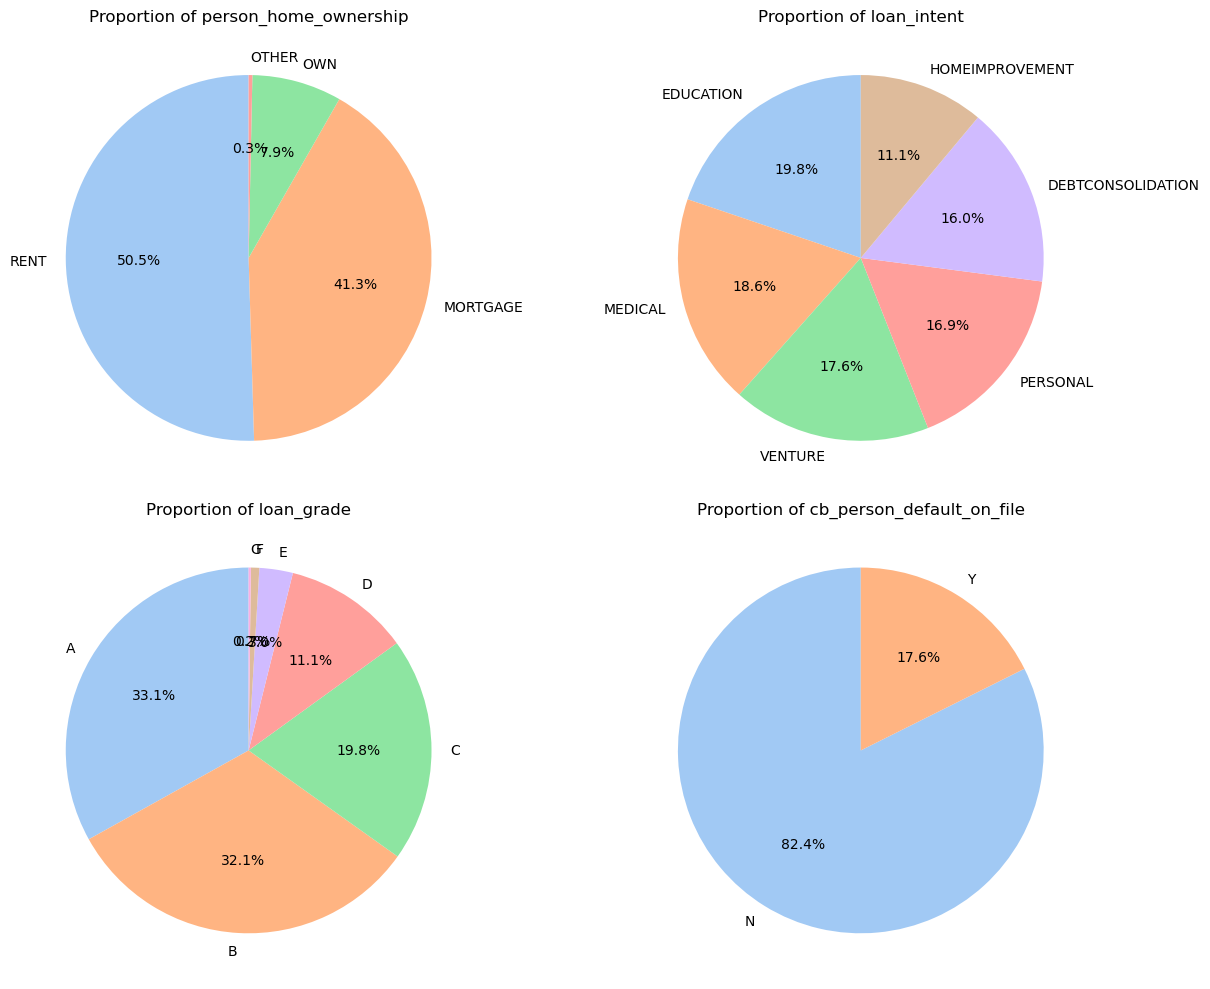

In [11]:
import matplotlib.pyplot as plt

# List of categorical columns
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Set the size of the plots
plt.figure(figsize=(15, 10))

# Loop through categorical columns and create pie charts
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    data = credit_risk_data[column].value_counts()
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(f'Proportion of {column}')
    plt.tight_layout()

# Show the plots
plt.show()


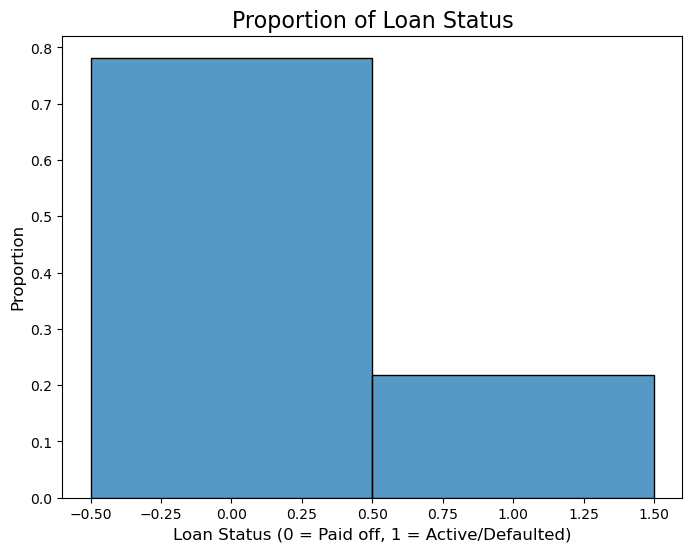

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Create a histogram to visualize the proportion of loan_status
sns.histplot(data=credit_risk_data, x='loan_status', stat='probability', discrete=True)

# Add title and labels
plt.title('Proportion of Loan Status', fontsize=16)
plt.xlabel('Loan Status (0 = Paid off, 1 = Active/Defaulted)', fontsize=12)
plt.ylabel('Proportion', fontsize=12)

# Show the plot
plt.show()


In [13]:
# Calculate the proportion of each loan_status (0 = Paid off, 1 = Active/Defaulted)
loan_status_proportions = credit_risk_data['loan_status'].value_counts(normalize=True)

# Convert to percentage
loan_status_proportions_percentage = loan_status_proportions * 100

# Display the result
print("Proportion of Loan Status (in %):")
print(loan_status_proportions_percentage)


Proportion of Loan Status (in %):
loan_status
0    78.183604
1    21.816396
Name: proportion, dtype: float64


In [14]:
import pandas as pd

# Specify the categorical columns to be one-hot encoded
columns_to_encode = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Perform one-hot encoding
credit_risk_encoded = pd.get_dummies(credit_risk_data, columns=columns_to_encode, drop_first=True)

# Display the first few rows of the encoded DataFrame
credit_risk_encoded.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,False,False,...,False,True,False,False,False,True,False,False,False,True
1,21,9600,5.0,1000,11.14,0,0.10,2,False,True,...,False,False,False,True,False,False,False,False,False,False
2,25,9600,1.0,5500,12.87,1,0.57,3,False,False,...,True,False,False,False,True,False,False,False,False,False
3,23,65500,4.0,35000,15.23,1,0.53,2,False,False,...,True,False,False,False,True,False,False,False,False,False
4,24,54400,8.0,35000,14.27,1,0.55,4,False,False,...,True,False,False,False,True,False,False,False,False,True


In [15]:
# Convert boolean values to integers (True = 1, False = 0)
credit_risk_encoded = credit_risk_encoded.astype(int)

# Display the first few rows of the updated DataFrame
credit_risk_encoded.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123,35000,16,1,0,3,0,0,...,0,1,0,0,0,1,0,0,0,1
1,21,9600,5,1000,11,0,0,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1,5500,12,1,0,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4,35000,15,1,0,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8,35000,14,1,0,4,0,0,...,1,0,0,0,1,0,0,0,0,1


In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming credit_risk_encoded is your DataFrame after one-hot encoding
# Separate features and target variable
X = credit_risk_encoded.drop(columns=['loan_status'])  # Exclude target column
y = credit_risk_encoded['loan_status']  # Target column

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform them
X_standardized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Combine standardized features with the target variable
credit_risk_standardized = pd.concat([X_standardized, y.reset_index(drop=True)], axis=1)

# Display the first few rows of the standardized DataFrame
credit_risk_standardized.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,loan_status
0,-0.903374,-0.114143,28.926614,4.019404,1.769382,0.0,-0.691554,-0.057402,-0.293499,0.990500,...,2.213885,-0.461414,-0.687208,-0.497207,2.825842,-0.174614,-0.086325,-0.044364,2.161294,1
1,-1.060904,-0.911147,0.056763,-1.358650,0.164538,0.0,-0.938167,-0.057402,3.407161,-1.009591,...,-0.451695,-0.461414,1.455163,-0.497207,-0.353877,-0.174614,-0.086325,-0.044364,-0.462686,0
2,-0.430783,-0.911147,-0.921876,-0.646849,0.485507,0.0,-0.691554,-0.057402,-0.293499,-1.009591,...,-0.451695,-0.461414,-0.687208,2.011234,-0.353877,-0.174614,-0.086325,-0.044364,-0.462686,1
3,-0.745843,-0.009274,-0.187897,4.019404,1.448413,0.0,-0.938167,-0.057402,-0.293499,0.990500,...,-0.451695,-0.461414,-0.687208,2.011234,-0.353877,-0.174614,-0.086325,-0.044364,-0.462686,1
4,-0.588313,-0.188358,0.790742,4.019404,1.127445,0.0,-0.444942,-0.057402,-0.293499,0.990500,...,-0.451695,-0.461414,-0.687208,2.011234,-0.353877,-0.174614,-0.086325,-0.044364,2.161294,1


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}
Training Accuracy: 0.9424
Test Accuracy: 0.9079

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      5094
           1       0.92      0.89      0.91      5096

    accuracy                           0.91     10190
   macro avg       0.91      0.91      0.91     10190
weighted avg       0.91      0.91      0.91     10190


Confusion Matrix:
[[4691  403]
 [ 536 4560]]


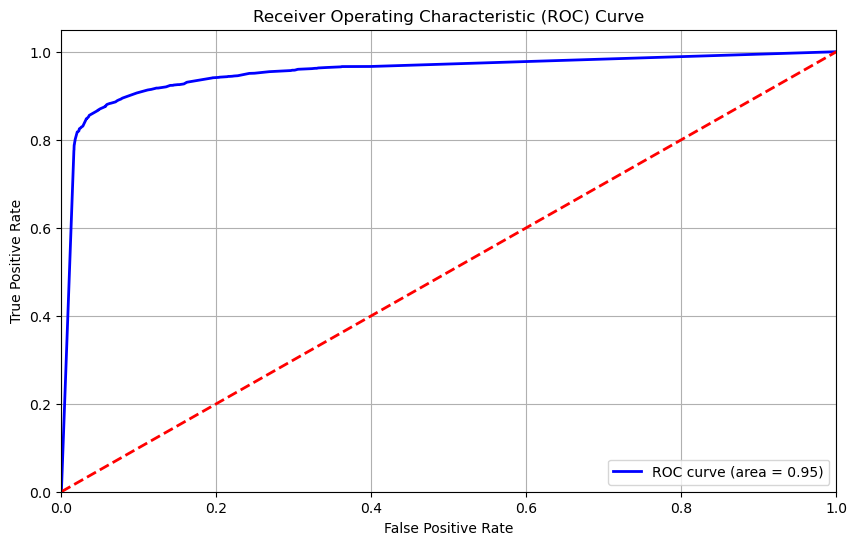

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load your data
# Assuming credit_risk_encoded is your DataFrame after encoding and standardizing
# For demonstration, let's say `credit_risk_encoded` is already defined

# Define your features (X) and target (y)
X = credit_risk_encoded.drop('loan_status', axis=1)  # Drop target variable
y = credit_risk_encoded['loan_status']

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the parameters for GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, 
                           scoring='f1', cv=kf, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Calculate training accuracy
train_accuracy = best_model.score(X_train, y_train)

# Predictions
y_pred = best_model.predict(X_test)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()
